In [7]:
#################################################################
#
#   main.py
#   main file for the demonstration of the ART algorithm
#   written by: Walter Simson
#               Chair for Computer Aided Medical Procedures
#               & Augmented Reality
#               Technical University of Munich
#               27.10.2017
#   based on the work of Maximilian Baust
#
#################################################################

import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio


In [8]:
def load_data(file_name):
    mat_contents = sio.loadmat(file_name)
    A = mat_contents['A']
    b = mat_contents['b']
    x = mat_contents['x']
    return A, b, x


def art(A, b, iterations):

    # For help with numpy (the numerical programming library for Python) check out this resource:
    # https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/ch04.html
    x = np.zeros((A.shape[1]))
    num_row_a = A.shape[0]
    # Initialize variables squared_norm (see numpy.zeros)
    squared_norm = np.zeros(num_row_a)   # Added
    
    # Added
    # Iterate over rows and compute the squared norm row-wise (we will need this in a second)
    # Hint: look into ranges
    #for i, a in enumerator(A):
    for i in range(0, num_row_a - 1):
        squared_norm[i] = np.linalg.norm(A[i]) ** 2

    # Iterate over iterations
        # Iterate over matrix rows
            # x' = x + correction
    for k in range(0, iterations - 1):
        for j in range(0, num_row_a - 1):   
            a = A[j]
            x = x + ((b[j] - np.dot(x, a)) / squared_norm[j]) * np.transpose(a)

    return x



In [9]:
# Clean up
plt.close('all')

# Load system of equations
# A is the system matrix, b is the right hand side,
# x is the true solution, i.e. Ax=b
A, b, x = load_data("system.mat")

# Set number of iterations
iterations = 50

In [10]:
# Solve LSE with numpy solver
x_np = np.linalg.solve(A, b)
x_np = x_np.reshape((60, 60))
# Warn like MATLAB
x_cond = np.linalg.cond(A)
warnings.warn("Warning: Matrix is close to singular or badly scaled." +
             " Results may be inaccurate. Condition = {0}.".format(x_cond))

# Solve LSE with ART
x_art = art(A, b, iterations)
x_art = x_art.reshape((60, 60))

# 1 iterations
x_art_1 = art(A, b, 10)
x_art_1 = x_art_1.reshape((60, 60))

# 100 iterations
x_art_100 = art(A, b, 100)
x_art_100 = x_art_100.reshape((60, 60))

# 300 iterations
x_art_300 = art(A, b, 300)
x_art_300 = x_art_300.reshape((60, 60))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Warning: Matrix is close to singular or badly scaled. Results may be inaccurate. Condition = 3.644278719863849e+17.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1874: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Determinant of A: inf


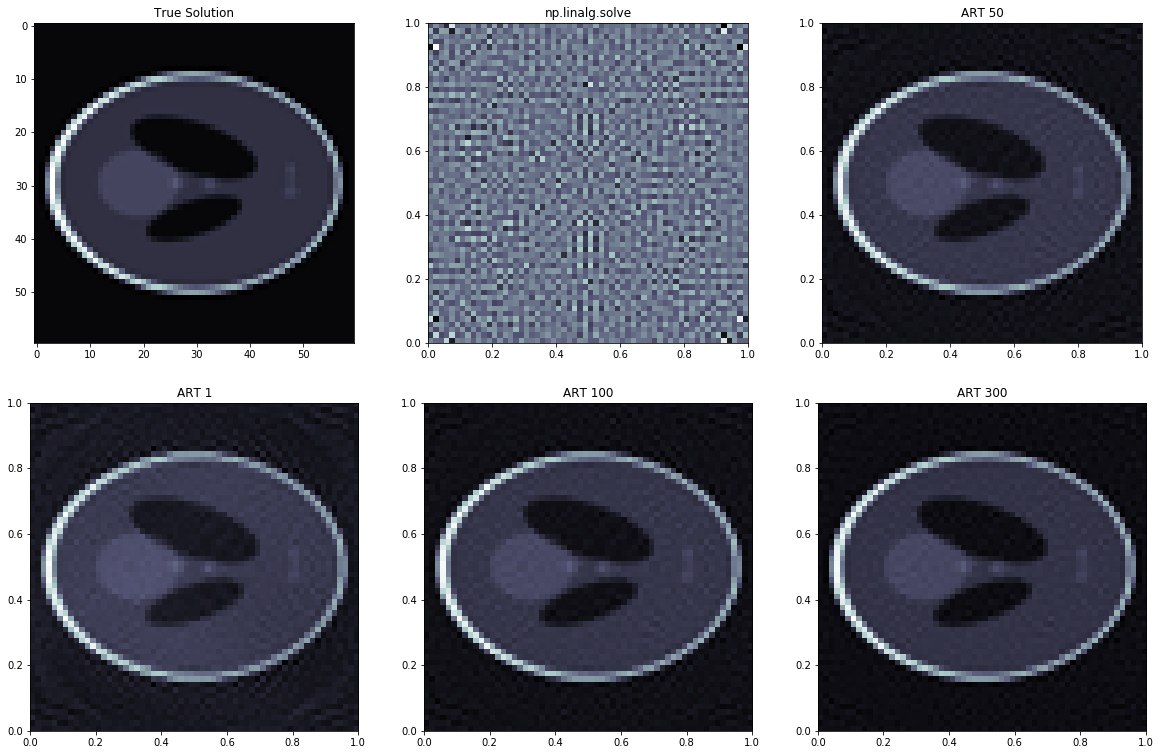

In [11]:
# Plot true solution
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(x.reshape(60, 60), cmap="bone")
plt.title('True Solution')
plt.draw()

# np.linalg.solve
fig.add_subplot(3, 3, 2)
plt.imshow(x_np.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('np.linalg.solve')
plt.draw()

# ART 50 iterations
fig.add_subplot(3, 3, 3)
plt.imshow(x_art.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 50')
plt.draw()

# ART 1 iterations
fig.add_subplot(1, 3, 1)
plt.imshow(x_art_1.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 1')
plt.draw()

# ART 100 iterations
fig.add_subplot(1, 3, 2)
plt.imshow(x_art_100.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 100')
plt.draw()

# ART 300 iterations
fig.add_subplot(1, 3, 3)
plt.imshow(x_art_300.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 300')
plt.draw()

# Added
print("Determinant of A:", np.linalg.det(A))

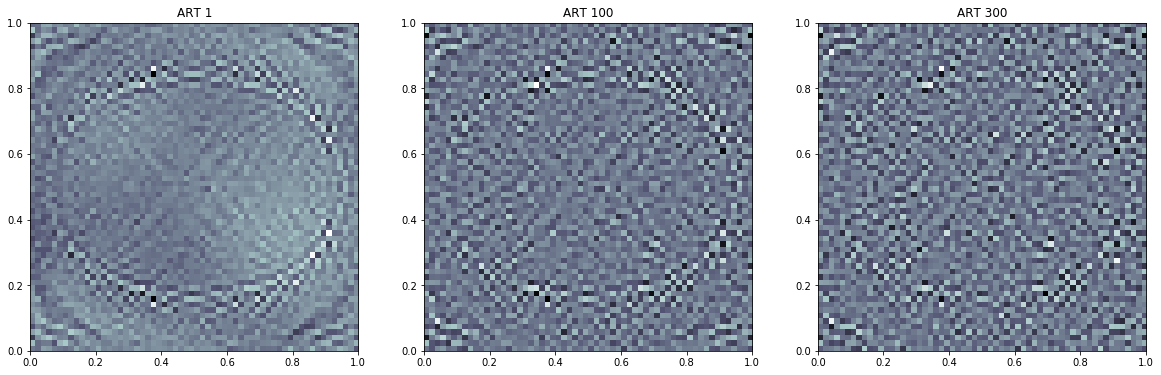

In [12]:
# Added
x_reshape = x.reshape((60, 60))
fig = plt.figure()

# ART 5 iterations
fig.add_subplot(1, 3, 1)
plt.imshow((x_reshape - x_art_1).reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 1')
plt.draw()

# ART 100 iterations
fig.add_subplot(1, 3, 2)
plt.imshow((x_reshape - x_art_100).reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 100')
plt.draw()

# ART 300 iterations
fig.add_subplot(1, 3, 3)
plt.imshow((x_reshape - x_art_300).reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART 300')
plt.draw()

From the result, we observe a slight improvement on image's quality as number of iterations get bigger (the solution converges). 
In constrast, the stardard solver from numpy returns a very poor result as we cannot find the determinant of A (thus, A inverse doesn't exist, implies that the matrix is singular).  

In [23]:
test = b.reshape(60, 60)
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)